## MNIST, PTA - Sai Teja Karnati

In [165]:
import os
import path
import struct
import gzip
import numpy as np
import matplotlib.pyplot as plt

Taking input from files using gzip

In [166]:

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [167]:

def read_idx_gz(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [168]:
trainingdata = read_idx_gz('train-images-idx3-ubyte.gz')
traininglabels = read_idx_gz('train-labels-idx1-ubyte.gz')
testingdata = read_idx_gz('t10k-images-idx3-ubyte.gz')
testinglabels = read_idx_gz('t10k-labels-idx1-ubyte.gz')

Training algorithm - calculating errors in each epoch and updating weights

In [169]:
def trainingPta(weights, epoch, threshold, learning_rate):
    while epoch<100:
        errors.append(0)
        for i in range(n):
            xi = trainingdata[i]
            xi.resize(784, 1)
            v = np.matmul(weights,xi)
            prediction = v.argmax(axis=0)
            actual = traininglabels[i]
            if prediction != actual:
                errors[epoch] += 1
        for i in range(n):
            xi = trainingdata[i]
            xi.resize(784, 1)
            y = np.array(stepactfn(np.matmul(weights,xi)))
            label = np.zeros((1,10)).T
            label[traininglabels[i]] = 1
            difference = label - y
            xit = np.transpose(xi)
            update = learning_rate * np.matmul(difference, xit)
            weights += update
        epoch += 1
        if errors[epoch-1]/n <= threshold:
            break

In [170]:
def stepactfn(x):
    i = 0
    y = np.empty([10,1])
    for each in x:
        if each >= 0:
            y[i] = 1.0
        else:
            y[i] = 0.0
        i += 1
    return y

In [171]:
def plotting(errors):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot(range(len(errors)), errors, c = 'green')
    plt.ylabel('Errors')
    plt.xlabel('Epochs')
    plt.title('Graph')
    plt.show()

In [172]:
def testing():
    test_errors = 0
    for i in range(len(test_data)):
        xi = testingdata[i]
        xi.resize(784, 1)
        v = np.matmul(weights ,xi)
        prediction = v.argmax(axis=0)
        actual = testinglabels[i]
        if prediction != actual:
            test_errors += 1
    print("Errors- testdata: ", test_errors)
    print("Error %- Testdata: ", test_errors*100/len(testingdata))

We can change hyper parameters here.

Case F - n=50 alpha = 1 ,E/thes=0

In [173]:
weights = np.random.uniform(-1, 1, size=(10,784))
n = 50
epoch = 0
thres = 0.0
alpha = 1.0
errors = []

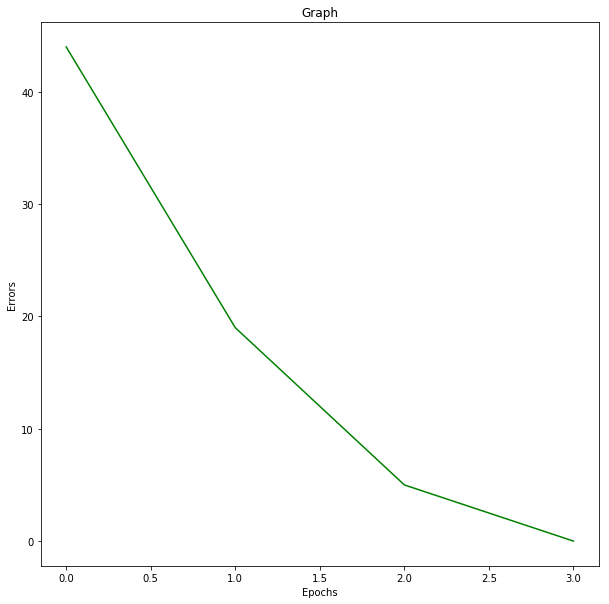

Errors- testdata:  4509
Error %- Testdata:  45.09


In [174]:
trainingPta(weights, epoch, thres, alpha)
plotting(errors)
testing()

Convergence occurs with 0 error in our small training data set in very few epochs but when tested on testing data, we get highly significant error 45.09%. This is due to the fact of having small data set of size 50 to train and overfitting the small data set. The fine tuning of occured in weights to predict these small examples has significantly deteriorated the quality to predict the testing data of 10000 examples.

Case G- n=1000 apha =1

In [176]:
weights = np.random.uniform(-1, 1, size=(10,784))
n = 1000
epoch = 0
thres = 0.0
alpha = 1.0
errors = []

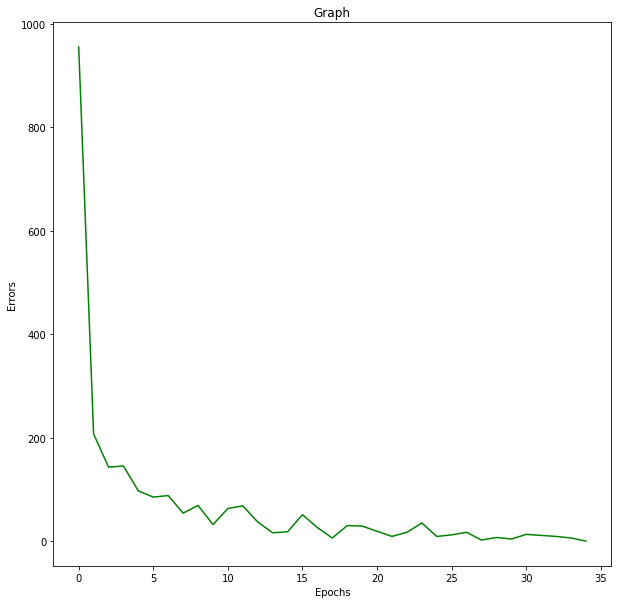

Errors- testdata:  1895
Error %- Testdata:  18.95


In [177]:
trainingPta(weights, epoch, thres, alpha)
plotting(errors)
testing()

 (g) Time to converge significantly increased to 50+ epochs and some fine tuning occured relatively on the 1000 size training data set. Since, this is used on 10000 testing data, there will be significant test error. We got an error of 18.95% which is less than then the previous case because we have bigger data set to train of 1000 compared to previous 50 and the time to converge took more epochs. The weights have been better adjusted but still less than 10% of data is being used to predict 90% data. Even though it converges to 0 in training set, this doesn't set as a good example for training with error of 18.95% in testing data.

Case H - n =60000 , alpha =1 E=0

In [180]:
weights = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
thres = 0.0
alpha = 1.0
errors = []

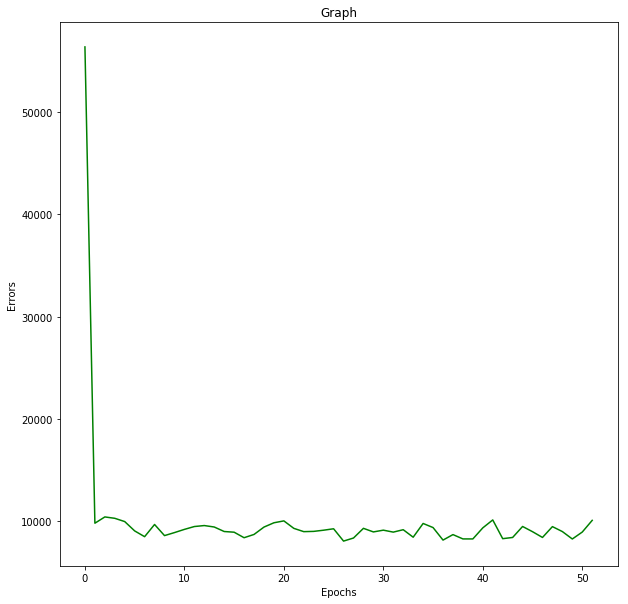

Errors- testdata:  1317
Error %- Testdata:  13.17


In [182]:
trainingPta(weights, epoch, thres, alpha)
plotting(errors)
testing()

 (h) The number of epochs and theshold have to be restricted since the convergence is taking significant amount of time and resources. It gave error 13.17% on testing data which is slight improvement over the previous case G. The significant increase in training sampe data has given only 3-5% boost is error reduction.

Trying with thres as 0.10

### Atempt 1

In [183]:
weights = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
thres = 0.10
alpha = 1.0
errors = []

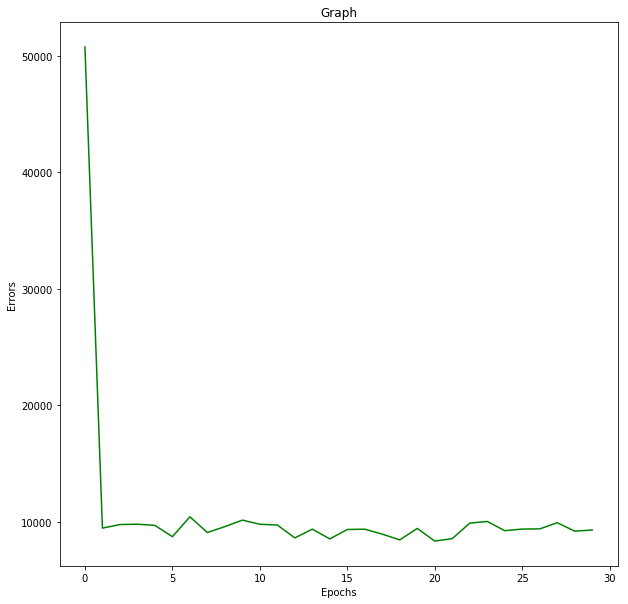

Errors- testdata:  1132
Error %- Testdata:  11.32


In [185]:
trainingPta(weights, epoch, thres, alpha)
plotting(errors)
testing()

### Atempt 2

In [186]:
weights = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
thres = 0.1
alpha = 1.0
errors = []

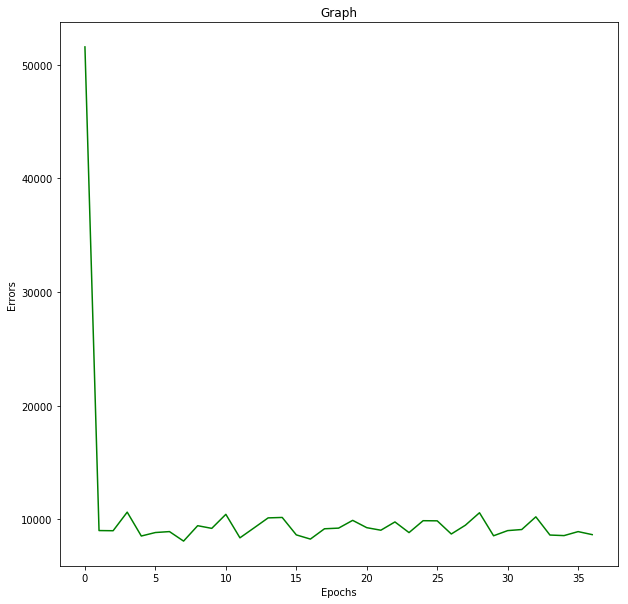

Errors- testdata:  1238
Error %- Testdata:  12.38


In [188]:
trainingPta(weights, epoch, thres, alpha)
plotting(errors)
testing()

For thres = 0.1, we are still having trouble with convergence. At around 10000 mistakes/60000 ,i.e 16% error, we are having a oscillatory pattern and convergence is failing. Now, I am attempting thres = 0.16

### Attempt 1

In [193]:
weights = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
thres = 0.16
alpha = 1.0
errors = []

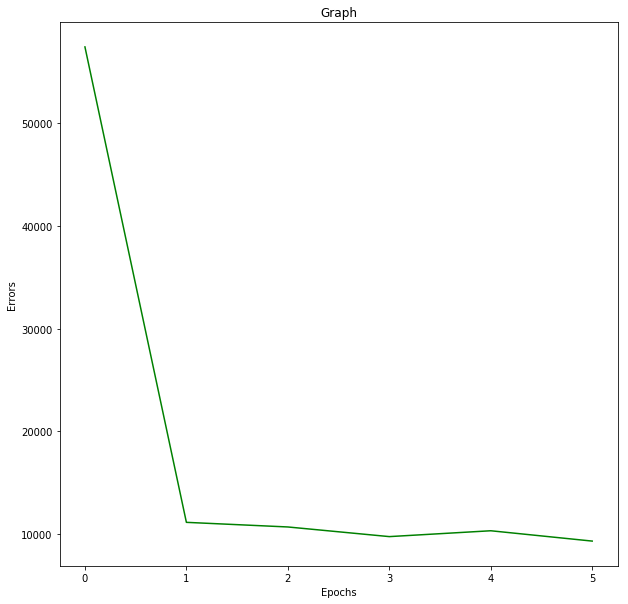

Errors- testdata:  1594
Error %- Testdata:  15.94


In [194]:
trainingPta(weights, epoch, thres, alpha)
plotting(errors)
testing()

#### Attempt 2

In [197]:
weights = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
thres = 0.16
alpha = 1.0
errors = []

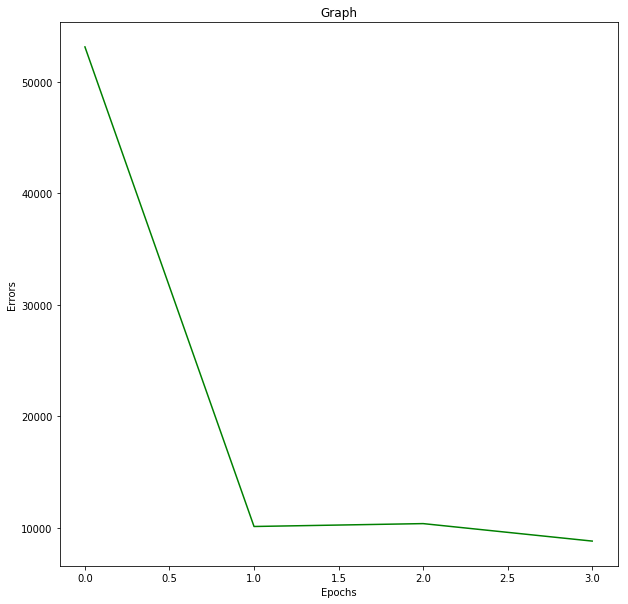

Errors- testdata:  1743
Error %- Testdata:  17.43


In [198]:
trainingPta(weights, epoch, thres, alpha)
plotting(errors)
testing()

So, we are getting similar graphs and convergence with 3-5 epochs and 0.16 thres with a error%= 15-17% in test data. 
Converging less that 0.15 seems to get harder even with a lot more epochs. 
And the increase in training data from 1000 to 60000 hasn't decreaed the accuracy that much. 